In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [118]:
df = pd.read_csv('train.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [119]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [120]:
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [121]:
print(len(df[df.label == 0]), 'Non-Hatred Tweets')
print(len(df[df.label == 1]), 'Hatred Tweets')

29720 Non-Hatred Tweets
2242 Hatred Tweets


# Preprocessing

In [122]:
import nltk
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import re

# Preprocessing the tweet column

In [123]:
def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

In [143]:
df['normalized_text'] = df.tweet.apply(normalizer)

# Extracting words with hashtag for further analysis

In [144]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets

In [145]:
df['hashtag'] = df.tweet.apply(extract_hashtag)

In [146]:
df.head()

,id,label,tweet,hashtag,normalized_text
0,1,0,@user when a father is dysfunctional and is s...,run,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,lyft disapointed getthanked,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model,model love u take u time ur
4,5,0,factsguide: society now #motivation,motivation,factsguide society motivation


# To Create Cloud of words for all words and hatred words

In [147]:
# all tweets 
all_words = " ".join(df.normalized_text)
#print(all_all_words)

In [148]:
hatred_words = " ".join(df[df['label']==1].normalized_text)

# All tweets cloudword

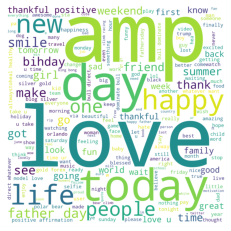

In [149]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

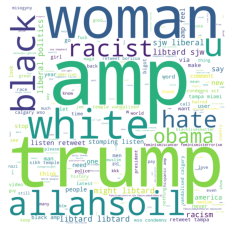

In [150]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(hatred_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Analysing Hashtag words

# plotting the most common hashtag used in tweets all hashtag hatred hashtag

In [151]:
freq_all_hashtag = FreqDist(list((" ".join(df1.hashtag)).split())).most_common(10)
freq_all_hashtag

[('love', 1591),
 ('positive', 879),
 ('smile', 577),
 ('healthy', 576),
 ('thankful', 471),
 ('fun', 463),
 ('life', 438),
 ('summer', 392),
 ('model', 366),
 ('cute', 364)]

In [152]:
freq_hatred_hashtag = FreqDist(list((" ".join(df1[df1['label']==1]['hashtag'])).split())).most_common(10)
freq_hatred_hashtag

[('trump', 134),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 32)]

In [153]:
df_allhashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
df_hatredhashtag = pd.DataFrame(freq_hatred_hashtag, columns=['words', 'frequency'])
print(df_allhashtag.head())
print(df_allhashtag.head())

      words  frequency
0      love       1591
1  positive        879
2     smile        577
3   healthy        576
4  thankful        471
      words  frequency
0      love       1591
1  positive        879
2     smile        577
3   healthy        576
4  thankful        471


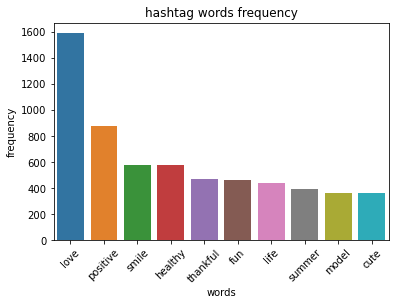

In [154]:
sns.barplot(x='words', y='frequency', data=df_allhashtag)
plt.xticks(rotation = 45)
plt.title('hashtag words frequency')
plt.show()

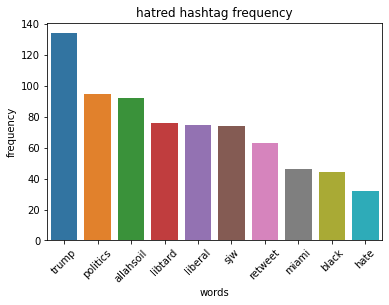

In [155]:
sns.barplot(x='words', y='frequency', data=df_hatredhashtag)
plt.xticks(rotation = 45)
plt.title('hatred hashtag frequency')
plt.show()

In [158]:
len(df)
corpus = []
for i in range(0,31962):
    corpus.append(df['normalized_text'][i])

In [159]:
cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [160]:
X = cv.transform(corpus).toarray()
y = df.iloc[:,1].values

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Classification     Logistic Regression (Linear Model)

In [162]:
classifier1 = LogisticRegression(C=10)
classifier1.fit(X_train, y_train)

C:\Users\sdash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [163]:
y_pred = classifier1.predict(X_test)
y_prob = classifier1.predict_proba(X_test)

In [164]:
print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6702702702702703
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9806
           1       0.78      0.58      0.67       742

    accuracy                           0.96     10548
   macro avg       0.88      0.79      0.82     10548
weighted avg       0.96      0.96      0.96     10548

[[9687  119]
 [ 308  434]]


# checking with TF-IDF vectorizer Unigram,

In [165]:
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=10, stop_words=stopwords.words('english'))
X1 = tfidf.fit_transform(corpus)

In [166]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.33, random_state=42)
classifier2 = LogisticRegression(C=10)
classifier2.fit(X1_train, y1_train)

C:\Users\sdash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [167]:
y1_pred = classifier2.predict(X1_test)
y1_prob = classifier2.predict_proba(X1_test)

In [168]:
print(f1_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))

0.6308943089430895
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      9806
           1       0.80      0.52      0.63       742

    accuracy                           0.96     10548
   macro avg       0.88      0.76      0.80     10548
weighted avg       0.95      0.96      0.95     10548

[[9706  100]
 [ 354  388]]


In [169]:
threshold = np.arange(0.1,0.9,0.1)
score = [f1_score(y1_test, ((y1_prob[:,1] >= x).astype(int))) for x in threshold]

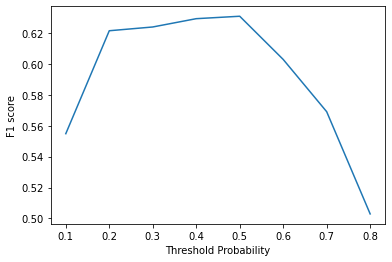

In [170]:
plt.plot(threshold, score)
plt.xlabel('Threshold Probability')
plt.ylabel('F1 score')
plt.show()

# performing classification model on our test data

In [171]:
df1 = pd.read_csv('test.csv')
df1.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [172]:
df1['normalized_text'] = df1['tweet'].apply(normalizer)

In [174]:
corpus_test = []
for i in range(0,17197):
    corpus_test.append(df1.normalized_text[i])

In [175]:
Test_X = tfidf.transform(corpus_test)

In [176]:
pred_Y = classifier2.predict(Test_X)
prob_Y = classifier2.predict_proba(Test_X)

In [177]:
df1['pred_label'] = pred_Y
scores = (prob_Y[:,1] >= 0.5).astype(int)
df1['score'] = scores

In [178]:
df1[df1.pred_label == 1]

,id,tweet,normalized_text,pred_label,score
19,31982,thought factory: bbc neutrality on right wing ...,thought factory bbc neutrality right wing fasc...,1,1
26,31989,chick gets fucked hottest naked lady,chick get fucked hottest naked lady,1,1
30,31993,i'll #never be #120 #again i'm #i'm a #thick...,never thick woman blacktina,1,1
33,31996,suppo the #taiji fisherman! no bullying! no ra...,suppo taiji fisherman bullying racism tweet ta...,1,1
110,32073,hey @user - a $14000 ivanka bracelet? do you f...,hey ivanka bracelet feel good profiting xenoph...,1,1
...,...,...,...,...,...
17128,49091,@user the uk governmentâs new #anti-semitism...,uk government new anti semitism definition con...,1,1
17148,49111,we grew up fucked upð¤ its fucked upð¥ i'm...,grew fucked fucked believing better place fucking,1,1
17176,49139,@user @user are the most racist pay ever!!!!!,racist pay ever,1,1
17188,49151,"black professor demonizes, proposes nazi style...",black professor demonizes proposes nazi style ...,1,1
